# Global Education Data Analysis

This notebook analyzes education data globally from 1999-2023.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("world-education-data.csv")

# Display the first few rows of the dataset
df.head()

,country,country_code,year,gov_exp_pct_gdp,lit_rate_adult_pct,pri_comp_rate_pct,pupil_teacher_primary,pupil_teacher_secondary,school_enrol_primary_pct,school_enrol_secondary_pct,school_enrol_tertiary_pct
0,Afghanistan,AFG,1999,NaN,NaN,NaN,33.18571,NaN,27.298849,NaN,NaN
1,Afghanistan,AFG,2000,NaN,NaN,NaN,NaN,NaN,22.162991,NaN,NaN
2,Afghanistan,AFG,2001,NaN,NaN,NaN,NaN,NaN,22.908590,14.47151,NaN
3,Afghanistan,AFG,2002,NaN,NaN,NaN,NaN,NaN,75.959747,NaN,NaN
4,Afghanistan,AFG,2003,NaN,NaN,NaN,NaN,NaN,96.553680,14.07805,1.38107


## Overview of Global Trends and Data Cleaning

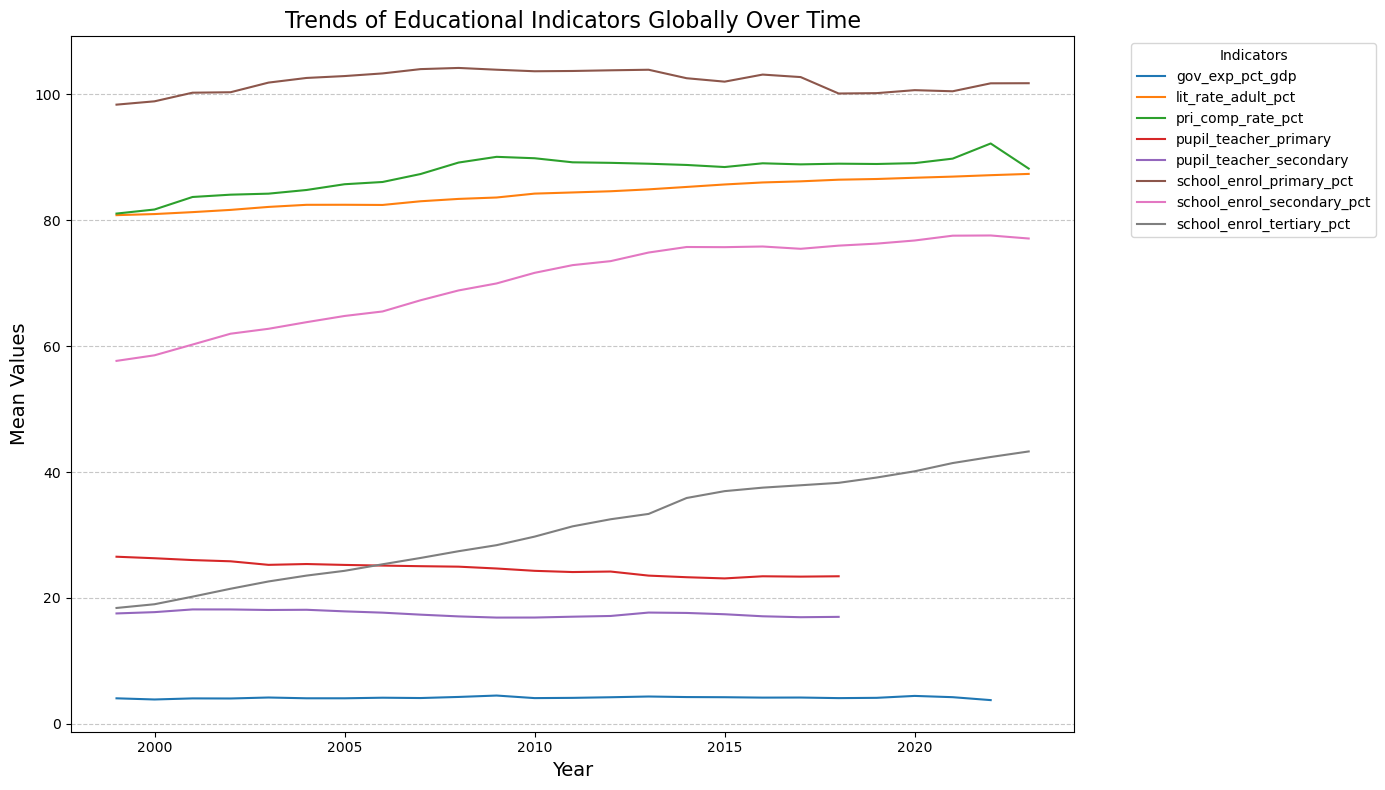

In [63]:
# Filter the dataset for rows where the country is 'World'
world_data = df[df['country'] == 'World']

# Group by 'year' and calculate the mean for each variable
world_trends = world_data.groupby('year').mean(numeric_only=True)

#Plotting the trends
plt.figure(figsize=(14, 8))

# Loop through each column (variable) and plot its trend
for column in world_trends.columns:
    plt.plot(world_trends.index, world_trends[column], label=column)

# Add labels and title
plt.title("Trends of Educational Indicators Globally Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Mean Values", fontsize=14)
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), title="Indicators")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

Observations:
1. The variable which saw the largest increase was the percentage of students enrolled in tertiary school, from around a little over 20% to a little over 40%. The second largest increase was the percentage of students in secondary school, which went from just under 60% to around 75%. This indicates that there is a worldwide increase in the amount of students reaching higher levels of education.

In [87]:
# Calculate the threshold for non-missing values
threshold = len(df.columns) * .5

# Drop rows with more than 50% missing values
df_cleaned = df.dropna(thresh=threshold)

# Inspect the cleaned DataFrame
print(df_cleaned.info())

#View unique years
print(df_cleaned['year'].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 5325 entries, 4 to 5891
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     5325 non-null   object 
 1   country_code                5325 non-null   object 
 2   year                        5325 non-null   int64  
 3   gov_exp_pct_gdp             4157 non-null   float64
 4   lit_rate_adult_pct          1801 non-null   float64
 5   pri_comp_rate_pct           4421 non-null   float64
 6   pupil_teacher_primary       3652 non-null   float64
 7   pupil_teacher_secondary     3009 non-null   float64
 8   school_enrol_primary_pct    5208 non-null   float64
 9   school_enrol_secondary_pct  4708 non-null   float64
 10  school_enrol_tertiary_pct   4234 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 499.2+ KB
None
[2003 2004 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 1999 2000 2

Explanation:
1. To ensure completeness of data, dropping rows which have missing values in 50% of their rows.
2. Viewing unique years to establish that the time frame runs from 1999 to 2023.  

## Comparing countries in the G7

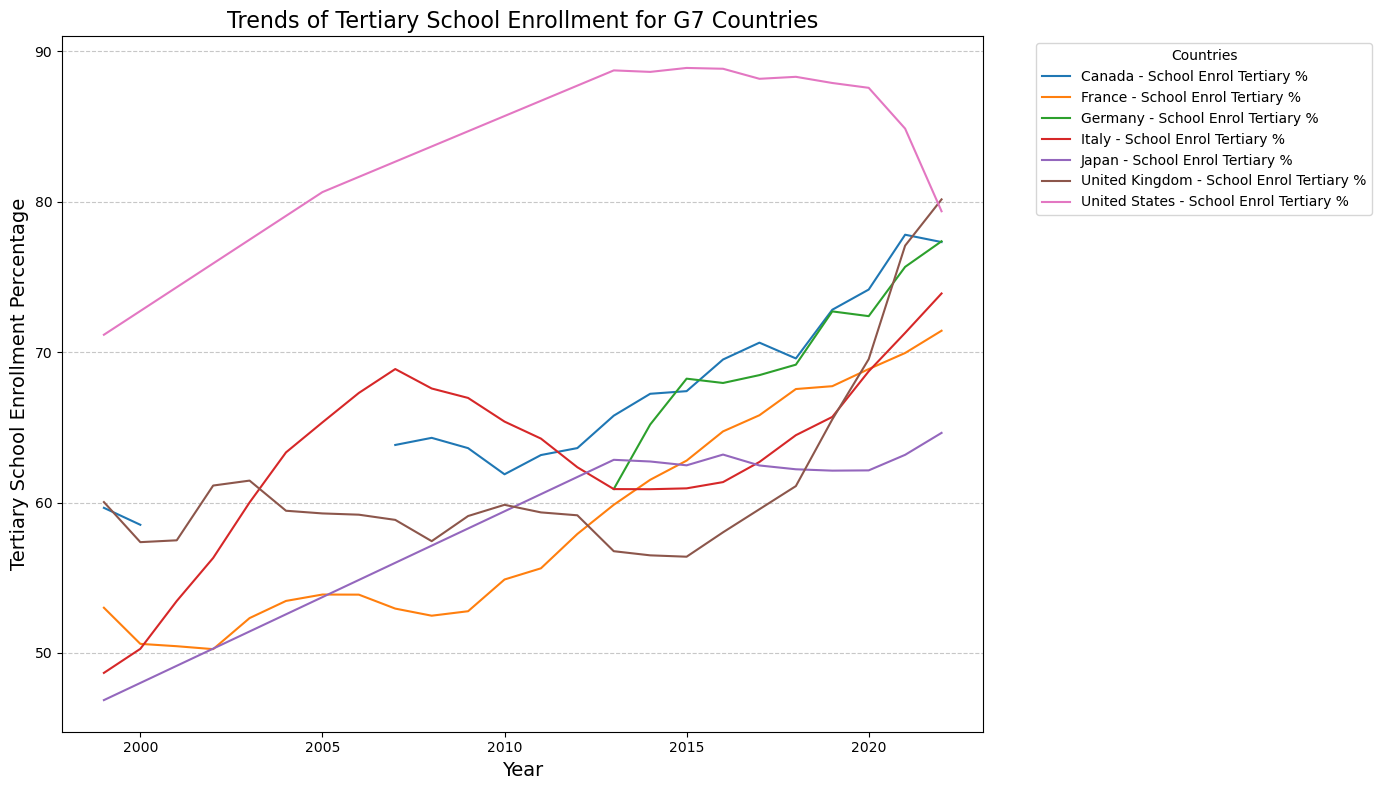

In [97]:
# Filter the dataset for G7 countries and the relevant column (school_enrol_tertiary_pct)
g7_data_filtered_tertiary = g7_data[['year', 'country', 'school_enrol_tertiary_pct']]
g7_data_filtered_tertiary = g7_data_filtered_tertiary[g7_data_filtered_tertiary['country'].isin(g7_countries)]

# Group by 'year' and 'country' to calculate the mean for tertiary enrollment percentage
g7_trends_filtered_tertiary = g7_data_filtered_tertiary.groupby(['year', 'country']).mean().reset_index()

# Set up the figure
plt.figure(figsize=(14, 8))

# Plot tertiary school enrollment percentage for each G7 country
for country in g7_countries:
    country_data = g7_trends_filtered_tertiary[g7_trends_filtered_tertiary['country'] == country]
    plt.plot(country_data['year'], country_data['school_enrol_tertiary_pct'], label=f'{country} - School Enrol Tertiary %')

# Add labels and title
plt.title("Trends of Tertiary School Enrollment for G7 Countries", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Tertiary School Enrollment Percentage", fontsize=14)
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), title="Countries")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


Observations:
1. The United States had the highest enrollment in tertiary education, such as colleges and universities, over the majority of the time observed, only falling behind the UK in the last year observed, 2023.
2. Most countries see an upward trend in their tertiary enrollment. In 1999, only the United States saw an enrollment level above 70%. However, by 2023, every country except for Japan was above this mark.
3. Only two countries saw a decrease of over 5% over any length of time between 1999 and 2023. Italy saw a large drop of around 8% from 2007 to 2013, which warrants further exploration. The United States saw a drop of around the same size after 2020, possibly correcting for the high rate of tertiary enrollment which far exceeded any other G7 nation.

Explanations:
1. Canada is missing data from 2001 to 2006, which is why they have a gap in tertiary enrollment statistics
2. Chose to focus on tertiary education for these countries since they have similar rates in most other indicators.

## Analyze whether education spending and policies (such as pupil-teacher ratio) influence literacy, enrollment, and overall educational outcomes.

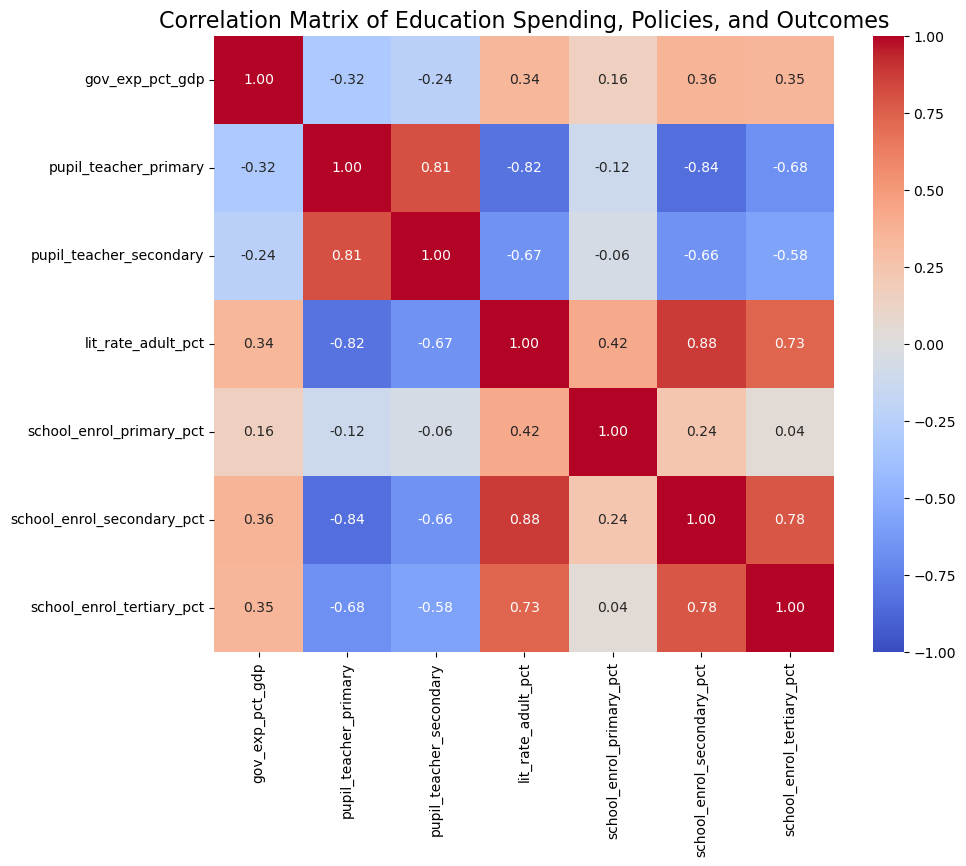

In [95]:
# Select relevant columns for correlation analysis
education_data = df_cleaned[['gov_exp_pct_gdp', 'pupil_teacher_primary', 'pupil_teacher_secondary', 
                             'lit_rate_adult_pct', 'school_enrol_primary_pct', 
                             'school_enrol_secondary_pct', 'school_enrol_tertiary_pct']]

# Calculate correlation matrix
correlation_matrix = education_data.corr()

#Plot the matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Education Spending, Policies, and Outcomes', fontsize=16)
plt.show()

Observations:
1. The pupil to teacher ratio has a strong negative correlation with literacy rate and school enrollment later on. The ratio has a stronger correlation in primary school than it does in secondary school
2. The government expenditures percentage has a much weaker positive correlation on these indicators.

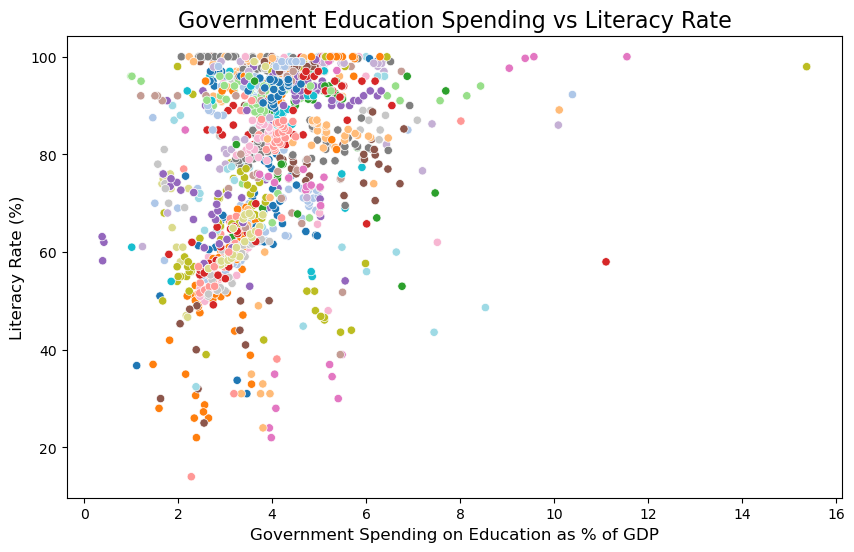

In [105]:
# Plot government spending vs literacy rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gov_exp_pct_gdp', y='lit_rate_adult_pct', data=df_cleaned, hue='country', palette='tab20', legend=False)
plt.title('Government Education Spending vs Literacy Rate', fontsize=16)
plt.xlabel('Government Spending on Education as % of GDP', fontsize=12)
plt.ylabel('Literacy Rate (%)', fontsize=12)
plt.show()

There is a positive correlation between government spending and education, but it is not very strong.

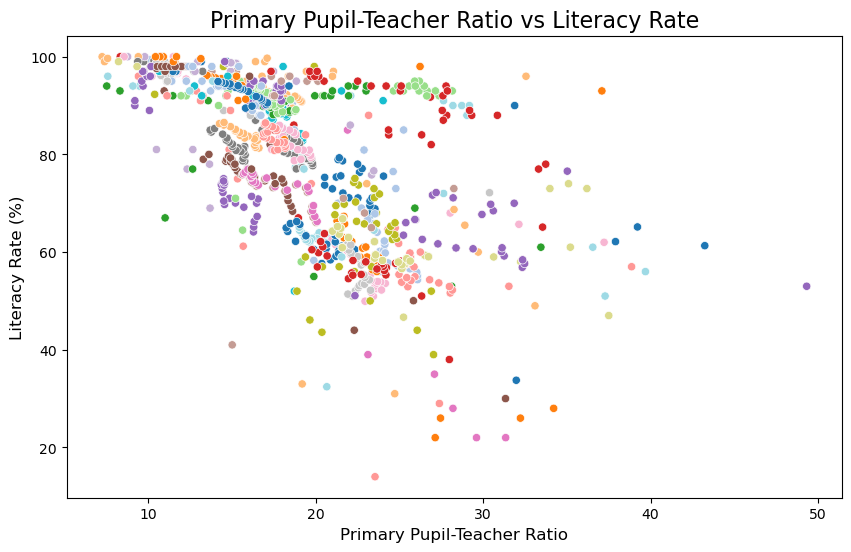

In [113]:
# Plot pupil-teacher ratio (primary) vs literacy rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pupil_teacher_secondary', y='lit_rate_adult_pct', data=df_cleaned, hue='country', palette='tab20', legend=False)
plt.title('Primary Pupil-Teacher Ratio vs Literacy Rate', fontsize=16)
plt.xlabel('Primary Pupil-Teacher Ratio', fontsize=12)
plt.ylabel('Literacy Rate (%)', fontsize=12)
plt.show()

There is a strong negative correlation between primary pupil-teacher ratio and literacy rate (similar graph for secondary education is not shown for conciseness).

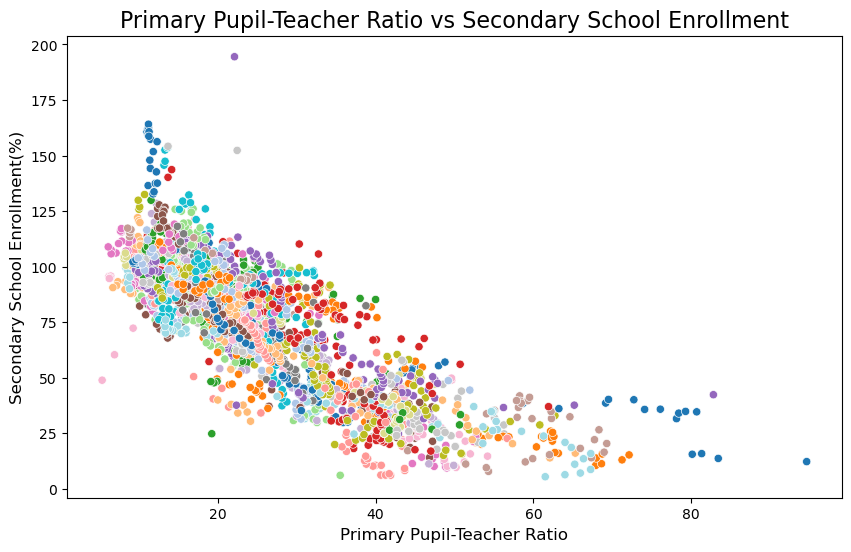

In [122]:
# Plot pupil-teacher ratio (primary) vs Secondary Enrollment
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pupil_teacher_primary', y='school_enrol_secondary_pct', data=df_cleaned, hue='country', palette='tab20', legend=False)
plt.title('Primary Pupil-Teacher Ratio vs Secondary School Enrollment', fontsize=16)
plt.xlabel('Primary Pupil-Teacher Ratio', fontsize=12)
plt.ylabel('Secondary School Enrollment(%)', fontsize=12)
plt.show()

There is a strong negative correlation between the pupil-teacher ratio at primary school and the enrollment in secondary school.

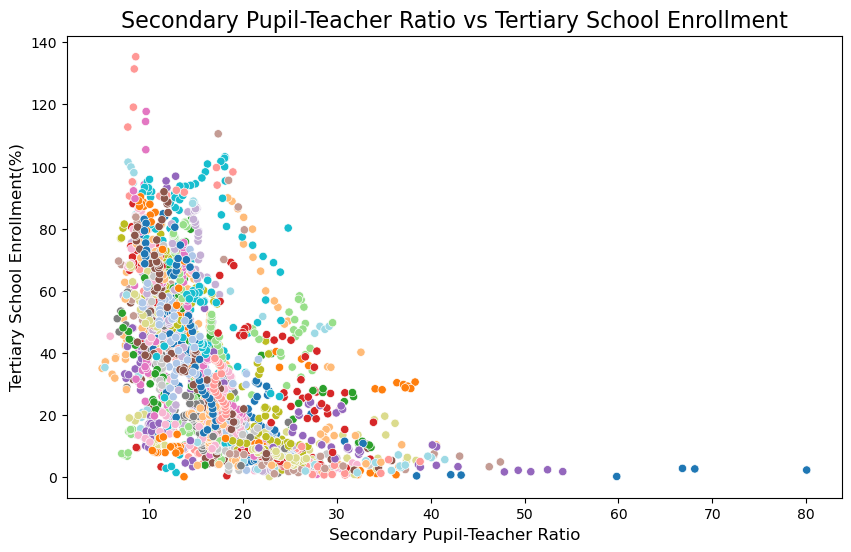

In [128]:
# Plot pupil-teacher ratio (secondary) vs Tertiary Enrollment
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pupil_teacher_secondary', y='school_enrol_tertiary_pct', data=df_cleaned, hue='country', palette='tab20', legend=False)
plt.title('Secondary Pupil-Teacher Ratio vs Tertiary School Enrollment', fontsize=16)
plt.xlabel('Secondary Pupil-Teacher Ratio', fontsize=12)
plt.ylabel('Tertiary School Enrollment(%)', fontsize=12)
plt.show()

The same trend applies when going from secondary school to tertiary school.

## Covid Effects

In [149]:
# Filter the data for the years 2019 and 2023
df_2019_2023 = df_cleaned[df_cleaned['year'].isin([2019, 2023])]

# Pivot the data to have one row per country and columns for the years 2019 and 2023
df_pivot = df_2019_2023.pivot(index='country', columns='year', values='pri_comp_rate_pct')

# Calculate the difference between 2023 and 2019 completion rates for each country
df_pivot['difference'] = df_pivot[2023] - df_pivot[2019]

# Drop rows where the difference is NaN (null)
df_pivot = df_pivot.dropna(subset=['difference'])

# Sort the countries by the difference (from highest to lowest)
df_sorted = df_pivot.sort_values(by='difference', ascending=False)

# Extract the top 10 and bottom 10 countries
top_10 = df_sorted.head(10)
bottom_10 = df_sorted.tail(10)

# Concatenate the top 10 and bottom 10 countries into one DataFrame
top_bottom_10 = pd.concat([top_10, bottom_10])

# Display the table with the differences
print(top_bottom_10)

year                        2019        2023  difference
country                                                 
Tanzania               63.591522   86.227089   22.635567
United Arab Emirates   84.047638   99.173790   15.126152
Sierra Leone           81.661591   96.754730   15.093140
Barbados               82.164124   96.736382   14.572258
Gibraltar             123.387100  137.431686   14.044586
Peru                   91.066078  104.106644   13.040565
Vanuatu                95.088409  106.601616   11.513206
Morocco                94.319229  104.691071   10.371841
Fiji                  102.205643  112.210442   10.004799
Nauru                 102.214020  111.384621    9.170601
Burkina Faso           61.821129   51.733829  -10.087299
Jamaica                89.744614   79.475449  -10.269165
Bahrain                99.656677   89.368767  -10.287910
Hong Kong SAR, China   97.068970   86.300911  -10.768059
Timor-Leste           102.624504   91.478943  -11.145561
Lesotho                82.85080

Observations:
1. We can see that many countries were not effected too badly by covid. The countries with positive differences (e.g Tanzania, UAE, etc.) all saw positive differences from 2019 to 2023, indicating that covid had less impact on these countries. Meanwhile, the Seychelles and Rwanda saw a large dropoff in students completing primary school, indicating that they had trouble adapting to the restrictions placed by Covid.

## Finally, how do education indicators differ between low-income and high-income countries?

/var/folders/25/df7ljtvs61d0czc813m_4p500000gn/T/ipykernel_65573/186078733.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Income Group', y='Primary Completion Rate (%)', data=comparison, palette='Blues', ax=axes[0])
/var/folders/25/df7ljtvs61d0czc813m_4p500000gn/T/ipykernel_65573/186078733.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Income Group', y='Primary Pupil-Teacher Ratio', data=comparison, palette='Greens', ax=axes[1])


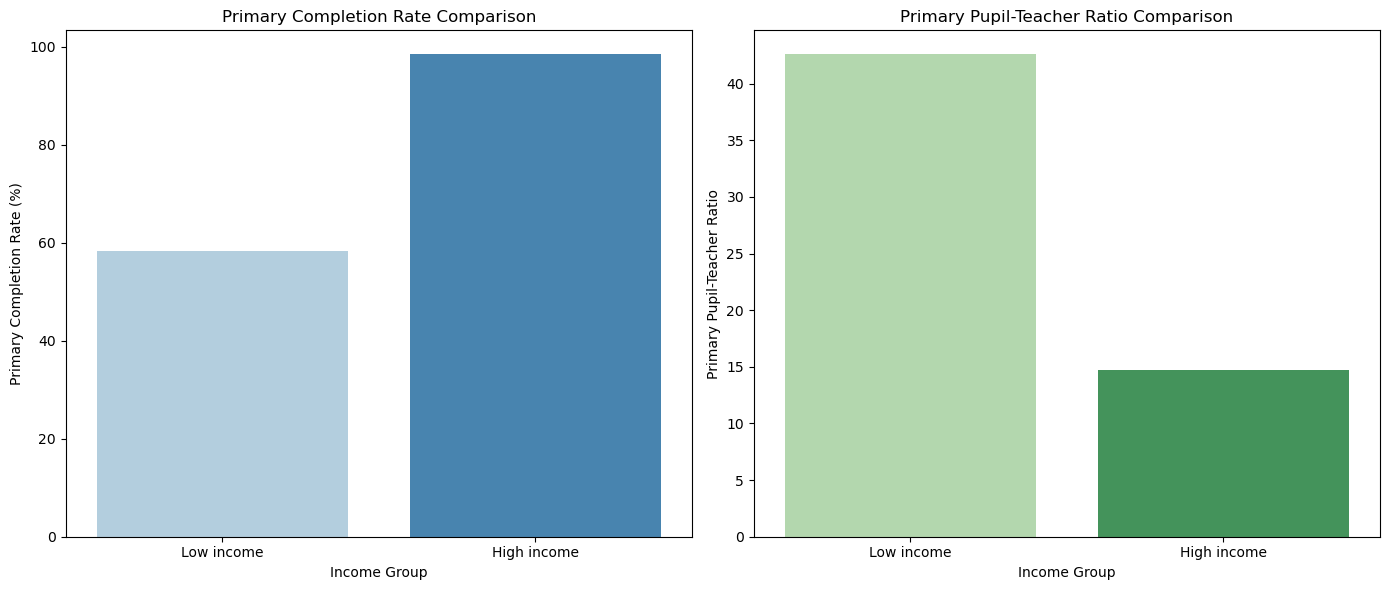

  Income Group  Primary Completion Rate (%)  Primary Pupil-Teacher Ratio
0   Low income                    58.239856                    42.581347
1  High income                    98.394933                    14.679101


In [160]:
# Filter the dataset for 'low income' and 'high income' rows
low_income_countries = df_cleaned[df_cleaned['country'] == 'Low income']
high_income_countries = df_cleaned[df_cleaned['country'] == 'High income']

# Calculate the mean primary completion rate and primary pupil-teacher ratio for low-income and high-income countries
low_income_mean_pri_comp = low_income_countries['pri_comp_rate_pct'].mean()
high_income_mean_pri_comp = high_income_countries['pri_comp_rate_pct'].mean()

low_income_mean_pupil_teacher = low_income_countries['pupil_teacher_primary'].mean()
high_income_mean_pupil_teacher = high_income_countries['pupil_teacher_primary'].mean()

# Create a DataFrame for easier comparison
comparison = pd.DataFrame({
    'Income Group': ['Low income', 'High income'],
    'Primary Completion Rate (%)': [low_income_mean_pri_comp, high_income_mean_pri_comp],
    'Primary Pupil-Teacher Ratio': [low_income_mean_pupil_teacher, high_income_mean_pupil_teacher]
})

# Plot the comparison of primary completion rates and pupil-teacher ratios
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for primary completion rate
sns.barplot(x='Income Group', y='Primary Completion Rate (%)', data=comparison, palette='Blues', ax=axes[0])
axes[0].set_title('Primary Completion Rate Comparison')
axes[0].set_ylabel('Primary Completion Rate (%)')

# Bar plot for primary pupil-teacher ratio
sns.barplot(x='Income Group', y='Primary Pupil-Teacher Ratio', data=comparison, palette='Greens', ax=axes[1])
axes[1].set_title('Primary Pupil-Teacher Ratio Comparison')
axes[1].set_ylabel('Primary Pupil-Teacher Ratio')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Display the comparison table
print(comparison)


High income countries have much higher primary completion rates and much lower pupil-teacher ratios than low income countries. This makes sense given the analysis given earlier.